In [1]:
import pandas as pd                          # used for loading and handling tabular data
import numpy as np                           # used for numerical calculations

import matplotlib.pyplot as plt              # used for plotting graphs
import seaborn as sns                        # used for better-looking statistical plots

from sklearn.model_selection import train_test_split   # used to split data into training and testing sets
from sklearn.linear_model import LinearRegression       # Linear Regression ML model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrics to evaluate model


In [2]:
df = pd.read_csv("/content/Housing.csv")     # loads the housing dataset CSV file into a DataFrame
df.head()                                   # displays the first 5 rows to verify data is loaded correctly


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()        # shows column names, data types, and non-null counts
df.describe()    # provides statistical summary for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.replace({'yes': 1, 'no': 0}, inplace=True)   # converts 'yes'/'no' values into numeric form for ML


/tmp/ipython-input-718409822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)   # converts 'yes'/'no' values into numeric form for ML


In [8]:
# converts all categorical (object) columns into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


In [9]:
X = df.drop('price', axis=1)   # input features (all columns except price)
y = df['price']                # target variable (house price)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [11]:
model = LinearRegression()     # creates Linear Regression model
model.fit(X_train, y_train)   # trains the model (no error now)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)   # predicts house prices for the test dataset


In [13]:
print("MAE:", mean_absolute_error(y_test, y_pred))              # average absolute prediction error
print("MSE:", mean_squared_error(y_test, y_pred))               # average squared prediction error
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))     # square root of MSE (penalizes large errors)
print("R2 Score:", r2_score(y_test, y_pred))                    # measures how well the model fits the data


MAE: 970043.4039201637
MSE: 1754318687330.6633
RMSE: 1324506.9600914384
R2 Score: 0.6529242642153185


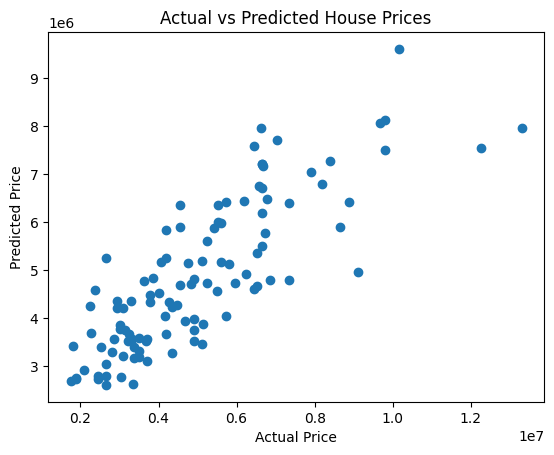

In [14]:
plt.scatter(y_test, y_pred)          # scatter plot comparing actual and predicted prices
plt.xlabel("Actual Price")           # label for x-axis
plt.ylabel("Predicted Price")        # label for y-axis
plt.title("Actual vs Predicted House Prices")  # title of the plot
plt.show()                           # displays the plot


In [15]:
coefficients = pd.DataFrame({
    'Feature': X.columns,            # feature names
    'Coefficient': model.coef_       # corresponding model coefficients
})

coefficients.sort_values(by='Coefficient', ascending=False)  # sorts features by importance


,Feature,Coefficient
2,bathrooms,1.094445e+06
8,airconditioning,7.914267e+05
7,hotwaterheating,6.846499e+05
10,prefarea,6.298906e+05
3,stories,4.074766e+05
6,basement,3.902512e+05
4,mainroad,3.679199e+05
5,guestroom,2.316100e+05
9,parking,2.248419e+05
1,bedrooms,7.677870e+04


In [17]:
import pickle                              # imports pickle library to save (serialize) Python objects into files

with open("model.pkl", "wb") as f:         # opens/creates a file named 'model.pkl' in write-binary mode
    pickle.dump(model, f)                  # saves the trained ML model object into the file for later use

with open("columns.pkl", "wb") as f:       # opens/creates a file named 'columns.pkl' in write-binary mode
    pickle.dump(X.columns, f)              # saves the feature column names to ensure correct input alignment during prediction
